<a href="https://colab.research.google.com/github/AkhdanFirdaus/bmn-model/blob/main/klasifikasi_teks_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Teks Laporan Mobil Dinas dengan BERT

# 4.3 Data Preparation

In [13]:
# Mount Drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# location_invoice = './raw_invoice.csv'
# location_sukucadang = './raw_sukucadang.csv'
# location_kerusakan = './raw_kategori_kerusakan.csv'
# location_laporan = './raw_laporan.csv'
location_invoice = '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Dataset/Raw Data/raw_invoice.csv'
location_sukucadang = '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Dataset/Raw Data/raw_sukucadang.csv'
location_kerusakan = '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Dataset/Raw Data/raw_kategori_kerusakan.csv'
location_laporan = '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Dataset/Raw Data/raw_laporan.csv'

## 4.3.1 Pemilahan Data

In [30]:
import numpy as np
import pandas as pd

In [31]:
data_invoice = pd.read_csv(location_invoice)[['Uraian Pekerjaan', 'Kategori', 'Harga Satuan']]
data_sukucadang =  pd.read_csv(location_sukucadang, sep=';')[['Id', 'Komponen', 'Keterangan']]
data_kerusakan = pd.read_csv(location_kerusakan)[['Kerusakan', 'Keterangan', 'Kategori']]
data_laporan = pd.read_csv(location_laporan)[['Laporan', 'Masalah', 'biaya']]

In [32]:
print('Invoice = ', data_invoice.shape)
print('Sukucadang = ', data_sukucadang.shape)
print('Kerusakan = ', data_kerusakan.shape)
print('Laporan = ', data_laporan.shape)

Invoice =  (526, 3)
Sukucadang =  (210, 3)
Kerusakan =  (11, 3)
Laporan =  (138, 3)


In [33]:
indicator_keys = ['Kategori', 'Masalah', 'Kerusakan']

# data_invoice['Uraian Pekerjaan']
# data_invoice['Kategori']
data_invoice['Harga Satuan'] = data_invoice['Harga Satuan'].apply(lambda x: float(x.replace(',', '')))

# data_sukucadang['Keterangan']

# data_kerusakan['Kerusakan']
# data_kerusakan['Keterangan']

# data_laporan['Laporan']
data_laporan['biaya'] = data_laporan['biaya'].apply(lambda x: float(x))

### Preview

In [34]:
data_invoice.head()

,Uraian Pekerjaan,Kategori,Harga Satuan
0,Shell HX-6 10/40 4Ltr,Oli,420000.0
1,Filter Oli YZZE1,Filter Oli,60000.0
2,Filter Udara Avanza VVTi,Filter Udara,175000.0
3,Service Rem Depan + Belakang,Rem,300000.0
4,Tune Up Injection Cleaner,Injeksi,350000.0


In [35]:
data_sukucadang.head()

,Id,Komponen,Keterangan
0,0,Shell HX-6 10/40 4Ltr,Oli mesin untuk kendaraan roda empat dengan b...
1,1,Filter Oli YZZE1,Filter oli untuk kendaraan roda empat yang di...
2,2,Filter Udara Avanza VVTi,Filter udara kualitas tinggi untuk kendaraan ...
3,3,Service Rem Depan + Belakang,Layanan perawatan rem depan dan belakang pada...
4,4,Tune Up Injection Cleaner,Layanan tune up dengan teknologi injection Cl...


In [36]:
data_kerusakan.head()

,Kerusakan,Keterangan,Kategori
0,Masalah Sistem Knalpot,Sistem pembuangan bertanggung jawab untuk meng...,Filter Udara;Oli;Bahan Bakar;Cleaner;Pasang;In...
1,Masalah Transmisi,Masalah transmisi kendaraan roda empat adalah ...,Oli;Transmisi;Pasang;Kopling;Joint;Bearing;Pas...
2,Masalah Suspensi,Suspensi kendaraan roda empat adalah kumpulan ...,Shockbreaker;Spooring;Balancing;Hidrolik;Pasang
3,Gangguan Listrik,Gangguan listrik pada kendaraan roda empat ter...,Lampu;Listrik;Pasang;Accu
4,Masalah Sistem Bahan Bakar,Masalah sistem bahan bakar kendaraan roda empa...,Bahan Bakar;Cleaner;Pasang;Kruk As;Injeksi;Fil...


In [37]:
data_laporan.head()

,Laporan,Masalah,biaya
0,Saya melihat indikator check engine menyala di...,Gangguan Listrik;Masalah Mesin,90000.0
1,"Saat saya menginjak rem, terdengar suara berde...",Kegagalan Rem,600000.0
2,Saya merasakan getaran yang tidak normal saat ...,Masalah Kemudi;Masalah Ban,1050000.0
3,"Mobil saya stir nya tidak stabil, lalu pada sa...",Gangguan Listrik;Masalah Kemudi;Masalah Mesin,2250000.0
4,kaca mobil tidak bisa bergerak,Kerusakan Aksesoris Interior Eksterior,150000.0


## 4.3.2 Pembersihan Data

In [5]:
pip install Sastrawi transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from transformers import BertTokenizer
import re

In [62]:
BERT_NAME = 'indobenchmark/indobert-lite-base-p1'

class Preprocess():
    def __init__(self, max_len=128):
        self.stemmer = StemmerFactory().create_stemmer()
        self.stopword = StopWordRemoverFactory().create_stop_word_remover()
        self.tokenizer = BertTokenizer.from_pretrained(BERT_NAME)
        self.max_len = max_len

    def cleaning(self, val):
        val = re.sub(r'\s+', ' ', val)
        val = re.sub("[^a-zA-Z0-9;]", " ", val)
        return val

    def casefolding(self, val):
        return str(val).lower()

    def stemming(self, val):
        return self.stemmer.stem(str(val))

    def stopwordremove(self, val):
        return self.stopword.remove(str(val))

    def embedding(self, val):
        return self.tokenizer.encode_plus(
            val,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='tf'
        )

    # def preprocessing(self, sentences):
    #     input_ids, attention_mask = [], []
    #     # melakukan looping nilai sentence
    #     for sentence in sentences:
    #         # pemanggilan fungsi casefolding, stemming, stopwordremove, embedding secara berurutan
    #         input = self.cleaning(sentence)
    #         input = self.casefolding(input)
    #         input = self.stemming(input)
    #         input = self.stopwordremove(input)
    #         output = self.embedding(input)
    #         input_ids.append(output['input_ids'])
    #         attention_mask.append(output['attention_mask'])

    #     # mengembalikan hasil preprocessing dengan nilai multiple
    #     return {
    #         'input_ids': tf.convert_to_tensor(np.asarray(input_ids).squeeze(), dtype=tf.int32),
    #         'attention_mask': tf.convert_to_tensor(np.asarray(attention_mask).squeeze(), dtype=tf.int32)
    #     }

    def preprocessing(self, sentences):
        for i in range(len(sentences)):
            input = sentences[i]
            input = self.cleaning(input)
            input = self.casefolding(input)
            input = self.stemming(input)
            input = self.stopwordremove(input)
            sentences[i] = input
        return sentences

    def tokenizing(self, sentences):
        input_ids, attention_mask = [], []
        for sentence in sentences:
            output = self.embedding(sentence)
            input_ids.append(output['input_ids'])
            attention_mask.append(output['attention_mask'])
        return {
            'input_ids': tf.convert_to_tensor(np.asarray(input_ids).squeeze(), dtype=tf.int32),
            'attention_mask': tf.convert_to_tensor(np.asarray(attention_mask).squeeze(), dtype=tf.int32)
        }


    def preprocess_get_token(self, sentences, display_len=20):
        # pemanggilan fungsi preprocessing
        tokenized = self.preprocessing(sentences)
        # mengembalikan hasil preprocessing berbentuk token
        return [self.tokenizer.convert_ids_to_tokens(tokenized['input_ids'][i][:display_len]) for i in range(len(sentences))]

preprocess = Preprocess()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizerFast'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
sample_texts = data_laporan.head(3)['Laporan']
print(sample_texts[0])
print(sample_texts[1])
print(sample_texts[2])

Saya melihat indikator check engine menyala di dashboard mobil saya.
Saat saya menginjak rem, terdengar suara berdecit yang tidak biasa.
Saya merasakan getaran yang tidak normal saat mengemudi di kecepatan tinggi.


### Casefolding

In [ ]:
hasil_casefolding = [preprocess.casefolding(sample) for sample in sample_texts]
print(hasil_casefolding[0])
print(hasil_casefolding[1])
print(hasil_casefolding[2])

saya melihat indikator check engine menyala di dashboard mobil saya.
saat saya menginjak rem, terdengar suara berdecit yang tidak biasa.
saya merasakan getaran yang tidak normal saat mengemudi di kecepatan tinggi.


In [ ]:
data_invoice['Uraian Pekerjaan'] = data_invoice['Uraian Pekerjaan'].apply(preprocess.casefolding)
data_invoice['Kategori'] = data_invoice['Kategori'].apply(preprocess.casefolding)

data_sukucadang['Komponen'] = data_sukucadang['Komponen'].apply(preprocess.casefolding)
data_sukucadang['Keterangan'] = data_sukucadang['Keterangan'].apply(preprocess.casefolding)

data_kerusakan['Kerusakan'] = data_kerusakan['Kerusakan'].apply(preprocess.casefolding)
data_kerusakan['Keterangan'] = data_kerusakan['Keterangan'].apply(preprocess.casefolding)
data_kerusakan['Kategori'] = data_kerusakan['Kategori'].apply(preprocess.casefolding)

data_laporan['Laporan'] = data_laporan['Laporan'].apply(preprocess.casefolding)
data_laporan['Masalah'] = data_laporan['Masalah'].apply(preprocess.casefolding)

### Cleaning

In [ ]:
hasil_cleaning = [preprocess.cleaning(sample) for sample in hasil_casefolding]
print(hasil_cleaning[0])
print(hasil_cleaning[1])
print(hasil_cleaning[2])

saya melihat indikator check engine menyala di dashboard mobil saya 
saat saya menginjak rem  terdengar suara berdecit yang tidak biasa 
saya merasakan getaran yang tidak normal saat mengemudi di kecepatan tinggi 


In [ ]:
data_invoice['Uraian Pekerjaan'] = data_invoice['Uraian Pekerjaan'].apply(preprocess.cleaning)
data_invoice['Kategori'] = data_invoice['Kategori'].apply(preprocess.cleaning)

data_sukucadang['Komponen'] = data_sukucadang['Komponen'].apply(preprocess.cleaning)
data_sukucadang['Keterangan'] = data_sukucadang['Keterangan'].apply(preprocess.cleaning)

data_kerusakan['Kerusakan'] = data_kerusakan['Kerusakan'].apply(preprocess.cleaning)
data_kerusakan['Keterangan'] = data_kerusakan['Keterangan'].apply(preprocess.cleaning)
data_kerusakan['Kategori'] = data_kerusakan['Kategori'].apply(preprocess.cleaning)

data_laporan['Laporan'] = data_laporan['Laporan'].apply(preprocess.cleaning)
data_laporan['Masalah'] = data_laporan['Masalah'].apply(preprocess.cleaning)

### Stemming

In [ ]:
hasil_stemming = [preprocess.stemming(sample) for sample in hasil_cleaning]
print(hasil_stemming[0])
print(hasil_stemming[1])
print(hasil_stemming[2])

saya lihat indikator check engine nyala di dashboard mobil saya
saat saya injak rem dengar suara decit yang tidak biasa
saya rasa getar yang tidak normal saat kemudi di cepat tinggi


In [ ]:
data_invoice['Uraian Pekerjaan'] = data_invoice['Uraian Pekerjaan'].apply(preprocess.stemming)
data_invoice['Kategori'] = data_invoice['Kategori'].apply(preprocess.stemming)


data_sukucadang['Keterangan'] = data_sukucadang['Keterangan'].apply(preprocess.stemming)

# data_kerusakan['Kerusakan'] = data_kerusakan['Kerusakan'].apply(preprocess.stemming)
data_kerusakan['Keterangan'] = data_kerusakan['Keterangan'].apply(preprocess.stemming)

data_laporan['Laporan'] = data_laporan['Laporan'].apply(preprocess.stemming)

### Stopword Removal

In [ ]:
hasil_stopword_remove = [preprocess.stopwordremove(sample) for sample in hasil_stemming]
print(hasil_stopword_remove[0])
print(hasil_stopword_remove[1])
print(hasil_stopword_remove[2])

lihat indikator check engine nyala dashboard mobil
saya injak rem dengar suara decit tidak biasa
rasa getar tidak normal kemudi cepat tinggi


In [ ]:
data_invoice['Uraian Pekerjaan'] = data_invoice['Uraian Pekerjaan'].apply(preprocess.stopwordremove)
data_invoice['Kategori'] = data_invoice['Kategori'].apply(preprocess.stopwordremove)

data_sukucadang['Keterangan'] = data_sukucadang['Keterangan'].apply(preprocess.stopwordremove)

data_kerusakan['Keterangan'] = data_kerusakan['Keterangan'].apply(preprocess.stopwordremove)

data_laporan['Laporan'] = data_laporan['Laporan'].apply(preprocess.stopwordremove)

### Filtering

In [ ]:
data_invoice = data_invoice.drop_duplicates(subset=['Uraian Pekerjaan'])
data_sukucadang = data_sukucadang.drop_duplicates(subset=['Komponen'])
data_kerusakan = data_kerusakan.drop_duplicates(subset=['Kerusakan'])
data_laporan = data_laporan.drop_duplicates(subset=['Laporan'])
data_laporan = data_laporan.dropna(subset=['biaya'])

In [ ]:
print('Invoice = ', data_invoice.shape)
print('Sukucadang = ', data_sukucadang.shape)
print('Kerusakan = ', data_kerusakan.shape)
print('Laporan = ', data_laporan.shape)

Invoice =  (199, 3)
Sukucadang =  (205, 3)
Kerusakan =  (11, 3)
Laporan =  (120, 3)


### Preview

In [ ]:
data_invoice.head()

,Uraian Pekerjaan,Kategori,Harga Satuan
0,shell hx 6 10 40 4ltr,oli,420000.0
1,filter oli yzze1,filter oli,60000.0
2,filter udara avanza vvti,filter udara,175000.0
3,service rem depan belakang,rem,300000.0
4,tune up injection cleaner,injeksi,350000.0


In [ ]:
data_sukucadang.head()

,Id,Komponen,Keterangan
0,0,shell hx 6 10 40 4ltr,oli mesin kendara roda empat bobot 4 liter fun...
1,1,filter oli yzze1,filter oli kendara roda empat guna nyaring kot...
2,2,filter udara avanza vvti,filter udara kualitas tinggi kendara roda empa...
3,3,service rem depan belakang,layan awat rem depan belakang kendara roda empat
4,4,tune up injection cleaner,layan tune up teknologi injection cleaner bers...


In [ ]:
data_kerusakan

,Kerusakan,Keterangan,Kategori
0,masalah sistem knalpot,sistem buang tanggung jawab hilang gas limbah ...,filter udara;oli;bahan bakar;cleaner;pasang;in...
1,masalah transmisi,masalah transmisi kendara roda empat kondisi m...,oli;transmisi;pasang;kopling;joint;bearing;pas...
2,masalah suspensi,suspensi kendara roda empat kumpul komponen fu...,shockbreaker;spooring;balancing;hidrolik;pasang
3,gangguan listrik,ganggu listrik kendara roda empat jadi ada mas...,lampu;listrik;pasang;accu
4,masalah sistem bahan bakar,masalah sistem bahan bakar kendara roda empat ...,bahan bakar;cleaner;pasang;kruk as;injeksi;fil...
5,masalah kemudi,sistem kemudi kendara fungsi bagai atur arah k...,stir;stabilizer;pasang;as;spooring;balancing;roda
6,masalah ban,masalah ban liput aus rata bocor ban rusa side...,ban;spooring;balancing;stabilizer;pasang;roda
7,masalah mesin,masalah mesin liput masalah sistem bakar bocor...,busi;mesin;overhoul;cleaner;piston;oli;bearing...
8,kegagalan rem,gagal rem liput aus kampas rem bocor sistem re...,rem
9,masalah sistem pendingin,masalah sistem dingin kendara roda empat jadi ...,radiator;fanbelt;filter;ac;pasang


In [ ]:
data_laporan.head()

,Laporan,Masalah,biaya
0,lihat indikator check engine nyala dashboard m...,gangguan listrik;masalah mesin,90000.0
1,saya injak rem dengar suara decit tidak biasa,kegagalan rem,600000.0
2,rasa getar tidak normal kemudi cepat tinggi,masalah kemudi;masalah ban,1050000.0
3,mobil stir nya stabil lalu menstater kadang ka...,gangguan listrik;masalah kemudi;masalah mesin,2250000.0
4,kaca mobil bisa gerak,kerusakan aksesoris interior eksterior,150000.0


## 4.3.3 Konstruksi Data

### Penentuan Fitur

- suku_cadang
- konteks
- biaya

1. dataset 1: gabungan daa
2. dataset 2: laporan

### Pemilihan Atribut

In [ ]:
# 1. Menggabungkan data invoice dan suku cadang
dataset_1 = pd.merge(
    data_invoice,
    data_sukucadang,
    left_on='Uraian Pekerjaan',
    right_on='Komponen',
)

# # 2. Uraian Pekerjaan dan Komponen memiliki fungsi yang sama
# #    Dua atribut tersebut akan dihapus dan akan diwakili
# #    oleh id sebagai representasi suku cadang
dataset_1 = dataset_1.drop(columns=['Uraian Pekerjaan', 'Komponen'])

dataset_1 = dataset_1.rename(columns={
    'Id': 'suku_cadang',
    'Harga Satuan': 'biaya',
    'Keterangan': 'konteks',
})

dataset_1.head()

,Kategori,biaya,suku_cadang,konteks
0,oli,420000.0,0,oli mesin kendara roda empat bobot 4 liter fun...
1,filter oli,60000.0,1,filter oli kendara roda empat guna nyaring kot...
2,filter udara,175000.0,2,filter udara kualitas tinggi kendara roda empa...
3,injeksi,350000.0,4,layan tune up teknologi injection cleaner bers...
4,oli,100000.0,5,oli khusus sistem transmisi kendara roda empat...


In [ ]:
dataset_1.shape

(129, 4)

In [ ]:
dataset_2 = data_laporan.copy().rename(columns={
    'Laporan': 'konteks',
    'Masalah': 'kategori'
})
dataset_2['suku_cadang'] = 0
dataset_2 = dataset_2[['kategori', 'biaya', 'suku_cadang', 'konteks']]
dataset_2.head()

,kategori,biaya,suku_cadang,konteks
0,gangguan listrik;masalah mesin,90000.0,0,lihat indikator check engine nyala dashboard m...
1,kegagalan rem,600000.0,0,saya injak rem dengar suara decit tidak biasa
2,masalah kemudi;masalah ban,1050000.0,0,rasa getar tidak normal kemudi cepat tinggi
3,gangguan listrik;masalah kemudi;masalah mesin,2250000.0,0,mobil stir nya stabil lalu menstater kadang ka...
4,kerusakan aksesoris interior eksterior,150000.0,0,kaca mobil bisa gerak


## 4.3.4 Pelabelan Data

### Penentuan Label

In [38]:
LABELS = data_kerusakan['Kerusakan'].tolist()

len(LABELS), LABELS,

(11,
 ['Masalah Sistem Knalpot',
  'Masalah Transmisi',
  'Masalah Suspensi',
  'Gangguan Listrik',
  'Masalah Sistem Bahan Bakar',
  'Masalah Kemudi',
  'Masalah Ban',
  'Masalah Mesin',
  'Kegagalan Rem',
  'Masalah Sistem Pendingin',
  'Kerusakan Aksesoris Interior Eksterior'])

### Penerapan Label

In [ ]:
dataset_1_labeled = dataset_1.copy()

# Memberikan nilai inisiasi (0) pada tiap label
dataset_1_labeled[LABELS] = 0

# labeling
for i, row in dataset_1_labeled.iterrows():
  kategori = row['Kategori'].split(';')

  for j, row2 in data_kerusakan.iterrows():
    array1 = row2['Kategori'].split(';')
    array2 = kategori

    label = row2['Kerusakan']

    kondisi = 1 if any(x in kategori for x in array1) else 0

    dataset_1_labeled.loc[i, label] = kondisi

dataset_1_labeled.head()

,Kategori,biaya,suku_cadang,konteks,masalah sistem knalpot,masalah transmisi,masalah suspensi,gangguan listrik,masalah sistem bahan bakar,masalah kemudi,masalah ban,masalah mesin,kegagalan rem,masalah sistem pendingin,kerusakan aksesoris interior eksterior
0,oli,420000.0,0,oli mesin kendara roda empat bobot 4 liter fun...,1,1,0,0,0,0,0,1,0,0,0
1,filter oli,60000.0,1,filter oli kendara roda empat guna nyaring kot...,1,1,0,0,1,0,0,1,0,0,0
2,filter udara,175000.0,2,filter udara kualitas tinggi kendara roda empa...,1,0,0,0,0,0,0,0,0,0,0
3,injeksi,350000.0,4,layan tune up teknologi injection cleaner bers...,1,0,0,0,1,0,0,1,0,0,0
4,oli,100000.0,5,oli khusus sistem transmisi kendara roda empat...,1,1,0,0,0,0,0,1,0,0,0


In [ ]:
dataset_1_labeled[LABELS].sum()

masalah sistem knalpot                    41
masalah transmisi                         45
masalah suspensi                          14
gangguan listrik                          33
masalah sistem bahan bakar                26
masalah kemudi                            20
masalah ban                               21
masalah mesin                             48
kegagalan rem                              3
masalah sistem pendingin                  26
kerusakan aksesoris interior eksterior    16
dtype: int64

In [ ]:
dataset_1_labeled[LABELS].sum().sum()

293

In [ ]:
dataset_1_labeled['label_sum'] =  dataset_1_labeled.iloc[:, 4:].sum(axis=1)

num_rows_with_multiple_labels = len(dataset_1_labeled[dataset_1_labeled['label_sum'] > 1])
num_rows_with_no_labels = len(dataset_1_labeled[dataset_1_labeled['label_sum'] == 0])
num_rows_with_one_labels = len(dataset_1_labeled[dataset_1_labeled['label_sum'] == 1])

print('Dataset 1 Length = ', len(dataset_1_labeled))
print('Has No Label   = ', num_rows_with_no_labels)
print('Has One Label  = ', num_rows_with_one_labels)
print('Has More than One Label  = ', num_rows_with_multiple_labels)

Dataset 1 Length =  129
Has No Label   =  0
Has One Label  =  81
Has More than One Label  =  48


In [ ]:
dataset_2_labeled = dataset_2.copy()

# Memberikan nilai inisiasi (0) pada tiap label
dataset_2_labeled[LABELS] = 0

# labeling
for i, row in dataset_2_labeled.iterrows():
  kategori = row['kategori'].split(';')

  for j, row2 in data_kerusakan.iterrows():
    label = row2['Kerusakan']

    kondisi = 1 if any(label in x for x in kategori) else 0

    # print(array2, label, kondisi)

    dataset_2_labeled.loc[i, label] = kondisi

dataset_2_labeled

,kategori,biaya,suku_cadang,konteks,masalah sistem knalpot,masalah transmisi,masalah suspensi,gangguan listrik,masalah sistem bahan bakar,masalah kemudi,masalah ban,masalah mesin,kegagalan rem,masalah sistem pendingin,kerusakan aksesoris interior eksterior
0,gangguan listrik;masalah mesin,90000.0,0,lihat indikator check engine nyala dashboard m...,0,0,0,1,0,0,0,1,0,0,0
1,kegagalan rem,600000.0,0,saya injak rem dengar suara decit tidak biasa,0,0,0,0,0,0,0,0,1,0,0
2,masalah kemudi;masalah ban,1050000.0,0,rasa getar tidak normal kemudi cepat tinggi,0,0,0,0,0,1,1,0,0,0,0
3,gangguan listrik;masalah kemudi;masalah mesin,2250000.0,0,mobil stir nya stabil lalu menstater kadang ka...,0,0,0,1,0,1,0,1,0,0,0
4,kerusakan aksesoris interior eksterior,150000.0,0,kaca mobil bisa gerak,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,masalah ban,120000.0,0,kondisi ban kendara terlalu licin perlu ganti,0,0,0,0,0,0,1,0,0,0,0
134,masalah mesin,900000.0,0,mesin kendara keluar suara decit perlu baik,0,0,0,0,0,0,0,1,0,0,0
135,masalah transmisi;gangguan listrik;masalah sis...,200000.0,0,kabel gas kendara terlalu kendor perlu ganti,0,1,0,1,1,0,0,0,0,0,0
136,masalah sistem pendingin,300000.0,0,kondisi ac kendara terlalu dingin perlu setel,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dataset_2_labeled[LABELS].sum()

masalah sistem knalpot                    11
masalah transmisi                         18
masalah suspensi                           5
gangguan listrik                          23
masalah sistem bahan bakar                 6
masalah kemudi                             9
masalah ban                               16
masalah mesin                             34
kegagalan rem                             11
masalah sistem pendingin                  15
kerusakan aksesoris interior eksterior    19
dtype: int64

In [ ]:
dataset_2_labeled[LABELS].sum().sum(),

(167,)

In [ ]:
dataset_2_labeled['label_sum'] =  dataset_2_labeled.iloc[:, 4:].sum(axis=1)

num_rows_with_multiple_labels = len(dataset_2_labeled[dataset_2_labeled['label_sum'] > 1])
num_rows_with_no_labels = len(dataset_2_labeled[dataset_2_labeled['label_sum'] == 0])
num_rows_with_one_labels = len(dataset_2_labeled[dataset_2_labeled['label_sum'] == 1])

print('Dataset 2 Length = ', len(dataset_2_labeled))
print('Has No Label   = ', num_rows_with_no_labels)
print('Has One Label  = ', num_rows_with_one_labels)
print('Has More than One Label  = ', num_rows_with_multiple_labels)

Dataset 2 Length =  120
Has No Label   =  0
Has One Label  =  79
Has More than One Label  =  41


In [ ]:
dataset_1_labeled.shape, dataset_2_labeled.shape

((129, 16), (120, 16))

## 4.3.5 Integrasi Data

In [ ]:
# Menggabungkan 2 dataset
dataset = pd.concat([dataset_1_labeled, dataset_2_labeled], axis=0).drop(columns=['Kategori', 'kategori'])
dataset

,biaya,suku_cadang,konteks,masalah sistem knalpot,masalah transmisi,masalah suspensi,gangguan listrik,masalah sistem bahan bakar,masalah kemudi,masalah ban,masalah mesin,kegagalan rem,masalah sistem pendingin,kerusakan aksesoris interior eksterior,label_sum
0,420000.0,0,oli mesin kendara roda empat bobot 4 liter fun...,1,1,0,0,0,0,0,1,0,0,0,3
1,60000.0,1,filter oli kendara roda empat guna nyaring kot...,1,1,0,0,1,0,0,1,0,0,0,4
2,175000.0,2,filter udara kualitas tinggi kendara roda empa...,1,0,0,0,0,0,0,0,0,0,0,1
3,350000.0,4,layan tune up teknologi injection cleaner bers...,1,0,0,0,1,0,0,1,0,0,0,3
4,100000.0,5,oli khusus sistem transmisi kendara roda empat...,1,1,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,120000.0,0,kondisi ban kendara terlalu licin perlu ganti,0,0,0,0,0,0,1,0,0,0,0,1
134,900000.0,0,mesin kendara keluar suara decit perlu baik,0,0,0,0,0,0,0,1,0,0,0,1
135,200000.0,0,kabel gas kendara terlalu kendor perlu ganti,0,1,0,1,1,0,0,0,0,0,0,3
136,300000.0,0,kondisi ac kendara terlalu dingin perlu setel,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
dataset.shape

(249, 15)

In [ ]:
dataset[LABELS].sum()

masalah sistem knalpot                    52
masalah transmisi                         63
masalah suspensi                          19
gangguan listrik                          56
masalah sistem bahan bakar                32
masalah kemudi                            29
masalah ban                               37
masalah mesin                             82
kegagalan rem                             14
masalah sistem pendingin                  41
kerusakan aksesoris interior eksterior    35
dtype: int64

In [ ]:
dataset[LABELS].sum().sum()

460

<Figure size 1000x600 with 0 Axes>

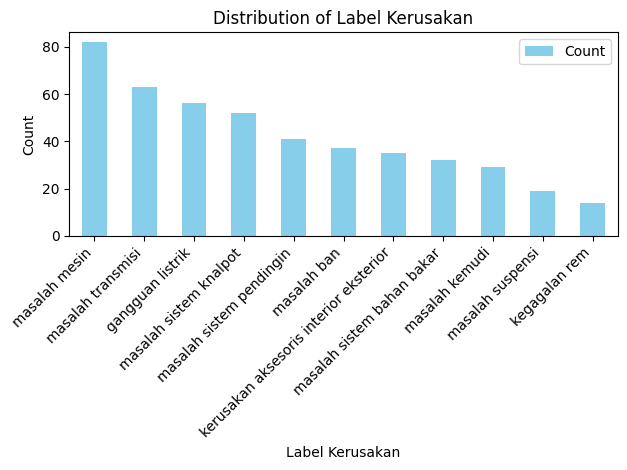

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = dict(dataset[LABELS].sum())

# Create a DataFrame from the data
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])

# Sort the DataFrame by count
df = df.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
df.plot(kind='bar', color='skyblue')
plt.title('Distribution of Label Kerusakan')
plt.xlabel('Label Kerusakan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
dataset['biaya'] = dataset['biaya'].apply(lambda x: x / 100000)

In [ ]:
dataset

,biaya,suku_cadang,konteks,masalah sistem knalpot,masalah transmisi,masalah suspensi,gangguan listrik,masalah sistem bahan bakar,masalah kemudi,masalah ban,masalah mesin,kegagalan rem,masalah sistem pendingin,kerusakan aksesoris interior eksterior,label_sum
0,4.20,0,oli mesin kendara roda empat bobot 4 liter fun...,1,1,0,0,0,0,0,1,0,0,0,3
1,0.60,1,filter oli kendara roda empat guna nyaring kot...,1,1,0,0,1,0,0,1,0,0,0,4
2,1.75,2,filter udara kualitas tinggi kendara roda empa...,1,0,0,0,0,0,0,0,0,0,0,1
3,3.50,4,layan tune up teknologi injection cleaner bers...,1,0,0,0,1,0,0,1,0,0,0,3
4,1.00,5,oli khusus sistem transmisi kendara roda empat...,1,1,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.20,0,kondisi ban kendara terlalu licin perlu ganti,0,0,0,0,0,0,1,0,0,0,0,1
134,9.00,0,mesin kendara keluar suara decit perlu baik,0,0,0,0,0,0,0,1,0,0,0,1
135,2.00,0,kabel gas kendara terlalu kendor perlu ganti,0,1,0,1,1,0,0,0,0,0,0,3
136,3.00,0,kondisi ac kendara terlalu dingin perlu setel,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
min_biaya = min(dataset['biaya'])
max_biaya = max(dataset['biaya'])

min_biaya, max_biaya

(0.1, 125.0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'biaya' is a column in your dataset
biaya_values = dataset['biaya'].values.reshape(-1, 1)  # Reshape for scaling

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_biaya = scaler.fit_transform(biaya_values)

# If you want to inverse transform the scaled values later
# original_biaya = scaler.inverse_transform(scaled_biaya)

scaled_biaya


array([[3.28262610e-02],
       [4.00320256e-03],
       [1.32105685e-02],
       [2.72217774e-02],
       [7.20576461e-03],
       [1.79343475e-01],
       [6.12489992e-02],
       [6.92554043e-02],
       [3.20256205e-03],
       [5.20416333e-03],
       [7.12570056e-02],
       [1.52121697e-02],
       [3.20256205e-03],
       [5.52441954e-02],
       [9.92794235e-02],
       [8.00640512e-03],
       [1.12089672e-02],
       [4.72377902e-02],
       [1.92153723e-02],
       [5.92473979e-02],
       [1.20096077e-03],
       [1.27301841e-01],
       [5.20416333e-03],
       [2.27381906e-01],
       [3.28262610e-02],
       [8.00640512e-03],
       [2.72217774e-02],
       [1.32105685e-02],
       [4.72377902e-02],
       [1.92153723e-02],
       [3.32265813e-02],
       [2.32185749e-02],
       [2.52201761e-02],
       [6.40512410e-03],
       [4.00320256e-04],
       [3.20256205e-03],
       [1.12089672e-02],
       [4.72377902e-02],
       [1.12089672e-02],
       [4.00320256e-03],


In [ ]:
# # Menyimpan Dataset
# dataset.to_csv('dataset.csv', index=False)

# !cp dataset.csv '/content/drive/MyDrive/TA/Dataset'

# 4.4 Modeling

In [1]:
!pip install transformers tensorflow livelossplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from transformers import TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from livelossplot import PlotLossesKeras

In [3]:
BERT_NAME = 'indobenchmark/indobert-lite-base-p1'

In [ ]:
def prediction_each_labels(scenario, predictions, y_test):

  # Compute precision, recall, and F1-score for each label
  label_precisions = precision_score(y_test, predictions, average=None)
  label_recalls = recall_score(y_test, predictions, average=None)
  label_f1_scores = f1_score(y_test, predictions, average=None)

  print("Scenario: ", scenario)
  # Print accuracy metrics for each label
  for label, precision, recall, f1 in zip(LABELS, label_precisions, label_recalls, label_f1_scores):
      print(f"Label: {label}")
      print(f"Precision: {precision}")
      print(f"Recall: {recall}")
      print(f"F1-score: {f1}")
      print()

## 4.4.1 Skenario Modeling

In [ ]:
active_skenario = 3

In [ ]:
skenario = [
    {"token_size": 128, "batch_size": 32, "test_size": 0.3, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 128, "batch_size": 32, "test_size": 0.3, "epochs": 30, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.3, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.3, "epochs": 30, "learning_rate": 2e-05},
    {"token_size": 128, "batch_size": 32, "test_size": 0.2, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 128, "batch_size": 32, "test_size": 0.2, "epochs": 30, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.2, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.2, "epochs": 30, "learning_rate": 2e-05},

    # Skenario Tambahan untuk prediksi suku cadang
    {"token_size": 128, "batch_size": 32, "test_size": 0.3, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 128, "batch_size": 32, "test_size": 0.3, "epochs": 30, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.3, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.3, "epochs": 30, "learning_rate": 2e-05},
    {"token_size": 128, "batch_size": 32, "test_size": 0.2, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 128, "batch_size": 32, "test_size": 0.2, "epochs": 30, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.2, "epochs": 10, "learning_rate": 2e-05},
    {"token_size": 256, "batch_size": 32, "test_size": 0.2, "epochs": 30, "learning_rate": 2e-05},
]

### Word Embedding

In [ ]:
sample_texts = dataset.head(3)["konteks"]
preprocess.preprocessing(sample_texts)

{'input_ids': <tf.Tensor: shape=(3, 128), dtype=int32, numpy=
 array([[    2,  9885,  1315,  1596,    85,  4815,  2011,  9300,   401,
          5358,  1539, 12291,  3242,    22,  1315,   895,  1429, 15996,
          1621, 19861,  1315,  1596,    85,  4164,  5075,  3456, 19688,
          5030,  7594,  3180,  3423,   985,  9885,  1429, 24565, 10013,
         18488, 14201,  1085,  7773,  1315,   830,  2476,  1315,   811,
          9303,   440,  9885,  1057,  2962,  4054,  2432,    55,  1315,
         16959, 26466,  1235,     3,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
  

In [ ]:
sample_texts = dataset.head(3)["konteks"]

hasil_tokenisasi = preprocess.preprocessing(sample_texts)
hasil_token = preprocess.preprocess_get_token(sample_texts)

print('input = ', sample_texts[0])
print('shape = ', hasil_tokenisasi['input_ids'].shape, hasil_tokenisasi['attention_mask'].shape, '\n')
print('input_ids = ', hasil_tokenisasi['input_ids'][0], '\n')
print('attention_mask = ', hasil_tokenisasi['attention_mask'][0], '\n')
print('token = ', hasil_token)

input =  oli mesin kendara roda empat bobot 4 liter fungsi bagai lumas mesin mobil teknologi sintetis bantu lindung mesin kendara dari kotor sisa bakar aus beri performa maksimal tahan lama oli telah teknologi active cleansing technology mampu jaga mesin tetap bersih mesin selalu asa baru itu oli dapat kurang gejala knocking mesin turbocharger
shape =  (3, 128) (3, 128) 

input_ids =  tf.Tensor(
[    2  9885  1315  1596    85  4815  2011  9300   401  5358  1539 12291
  3242    22  1315   895  1429 15996  1621 19861  1315  1596    85  4164
  5075  3456 19688  5030  7594  3180  3423   985  9885  1429 24565 10013
 18488 14201  1085  7773  1315   830  2476  1315   811  9303   440  9885
  1057  2962  4054  2432    55  1315 16959 26466  1235     3     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     

## 4.4.2 Pembangunan Model

In [ ]:
bert_model = TFBertModel.from_pretrained(BERT_NAME)

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p1 were not used when initializing TFBertModel: ['sop_classifier', 'albert', 'predictions']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p1 and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# def classification_model(bert_encoder, num_labels, max_len, learning_rate):
#   input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
#   attention_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

#   encoding_layer = bert_encoder(input_ids, attention_mask)[0]

#   l = tf.keras.layers.GlobalAveragePooling1D(name='pooling_layer')(encoding_layer)
#   l = tf.keras.layers.Dropout(0.1, name='dropout_layer')(l)
#   l = tf.keras.layers.Dense(num_labels, activation='sigmoid', name='output_layer')(l)

#   model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[l])

#   OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#   LOSS = tf.keras.losses.BinaryCrossentropy()
#   METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy')]

#   model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

#   return model

def classification_model(bert_encoder, num_labels, max_len, learning_rate):
  input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
  attention_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

  encoding_layer = bert_encoder(input_ids, attention_mask)[0]
  pooling_layer = tf.keras.layers.GlobalAveragePooling1D(name='pooling_layer')(encoding_layer)

  l = tf.keras.layers.Dropout(0.1, name='label_dropout')(pooling_layer)
  label_output = tf.keras.layers.Dense(num_labels, activation='sigmoid', name='label_output')(l)

  estimated_price_output = tf.keras.layers.Dense(1, activation='linear', name='estimated_price_output')(label_output)

  model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[label_output, estimated_price_output])

  OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  LOSSES = {'label_output': tf.keras.losses.BinaryCrossentropy(), 'estimated_price_output': tf.keras.losses.MeanSquaredError()}

  LOSS_WEIGHTS = {'label_output': 1.0, 'estimated_price_output': 0.2}

  METRICS = {
      'label_output': [tf.keras.metrics.BinaryAccuracy(name='label_accuracy')],
      'estimated_price_output': [tf.keras.metrics.MeanSquaredError(name='price_mse')]
  }

  model.compile(optimizer=OPTIMIZER, loss=LOSSES, loss_weights=LOSS_WEIGHTS, metrics=METRICS)

  return model

classification_model = classification_model(
    bert_encoder=bert_model,
    num_labels=len(LABELS),
    max_len=skenario[active_skenario]["token_size"],
    learning_rate=skenario[active_skenario]["learning_rate"]
)

classification_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109081344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

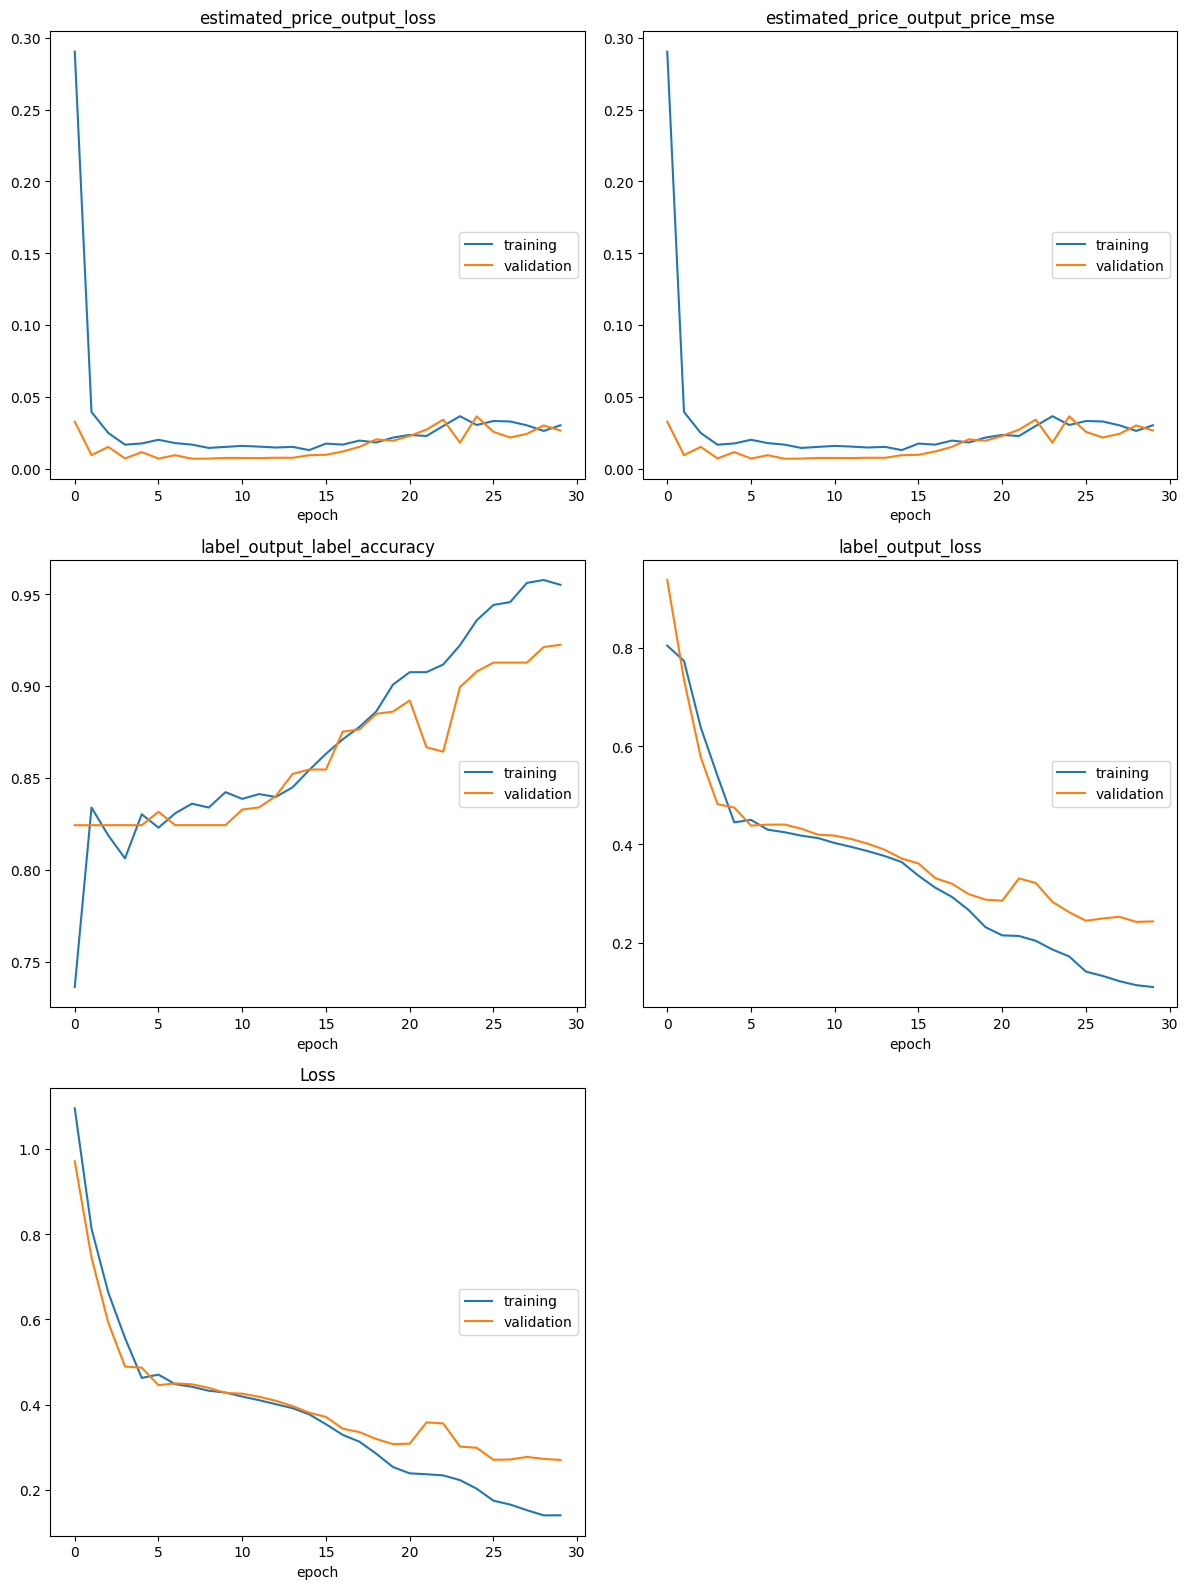

estimated_price_output_loss
	training         	 (min:    0.013, max:    0.290, cur:    0.030)
	validation       	 (min:    0.007, max:    0.036, cur:    0.026)
estimated_price_output_price_mse
	training         	 (min:    0.013, max:    0.290, cur:    0.030)
	validation       	 (min:    0.007, max:    0.036, cur:    0.026)
label_output_label_accuracy
	training         	 (min:    0.736, max:    0.958, cur:    0.955)
	validation       	 (min:    0.824, max:    0.922, cur:    0.922)
label_output_loss
	training         	 (min:    0.110, max:    0.805, cur:    0.110)
	validation       	 (min:    0.242, max:    0.938, cur:    0.244)
Loss
	training         	 (min:    0.140, max:    1.095, cur:    0.140)
	validation       	 (min:    0.270, max:    0.971, cur:    0.270)
6/6 [==============================] - 12s 2s/step - loss: 0.1401 - label_output_loss: 0.1100 - estimated_price_output_loss: 0.0301 - label_output_label_accuracy: 0.9551 - estimated_price_output_price_mse: 0.0301 - val_loss: 0.2

In [ ]:
preprocess = Preprocess(max_len = skenario[active_skenario]["token_size"])

X_train, X_test, y_train_labels, y_test_labels, y_train_biaya, y_test_biaya = train_test_split(
    dataset['konteks'],
    dataset[LABELS],
    scaled_biaya,
    test_size=skenario[active_skenario]["test_size"],
    random_state=42
)

X_train = preprocess.preprocessing(X_train)
X_test = preprocess.preprocessing(X_test)

train_dataset_classification = tf.data.Dataset.from_tensor_slices(
    (
        {'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
        {'label_output': y_train_labels, 'estimated_price_output': y_train_biaya}
    )
).batch(skenario[active_skenario]["batch_size"])

test_dataset_classification = tf.data.Dataset.from_tensor_slices(
    (
        {'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},
        {'label_output': y_test_labels, 'estimated_price_output': y_test_biaya}
    )
).batch(skenario[active_skenario]["batch_size"])

classification_model.fit(
    train_dataset_classification,
    epochs=skenario[active_skenario]["epochs"],
    validation_data=test_dataset_classification,
    callbacks=[PlotLossesKeras()]
)

# 4.5 Model Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def get_confidence_scores(predictions):
    return np.max(predictions, axis=1)  # Get the maximum probability for each prediction

def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

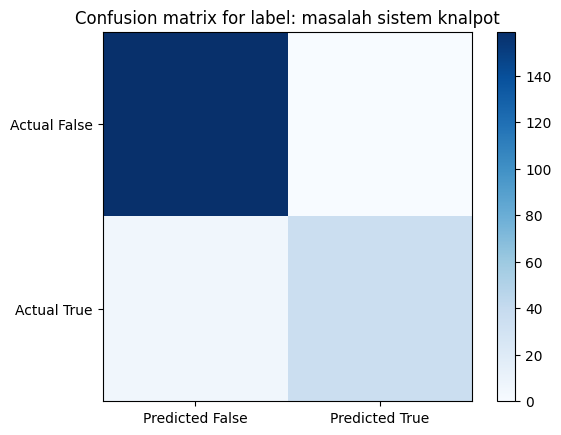

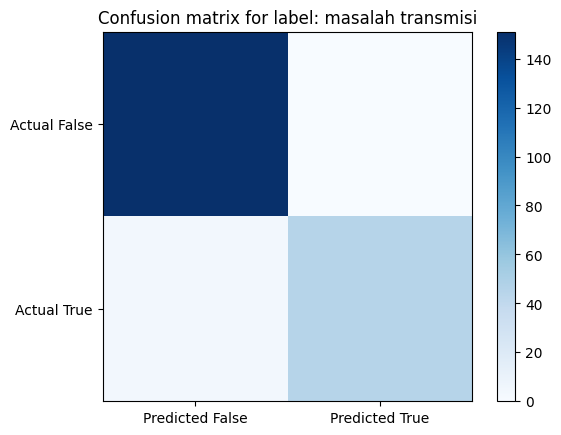

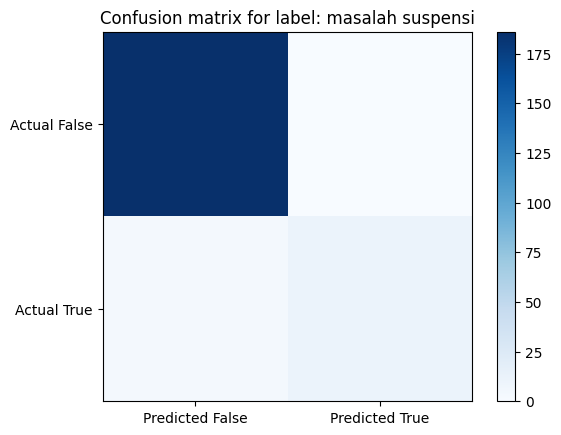

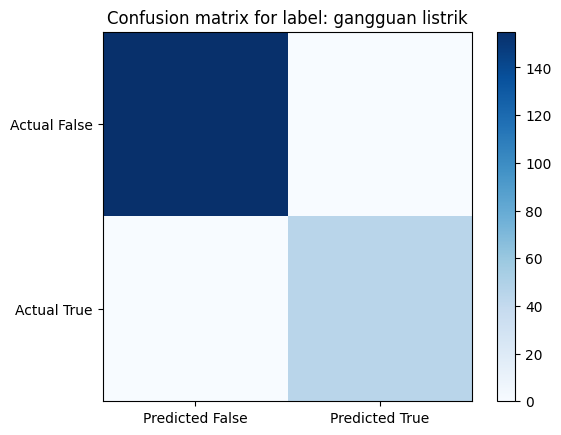

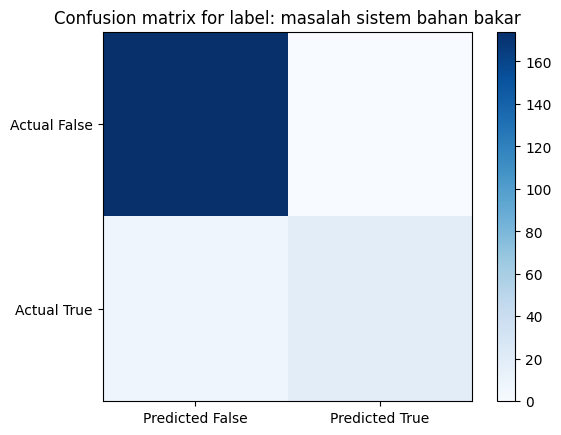

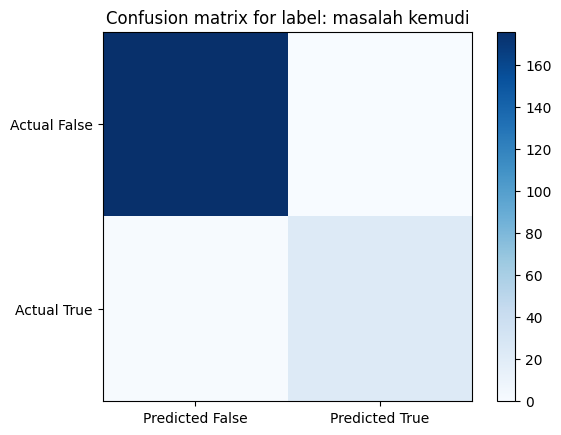

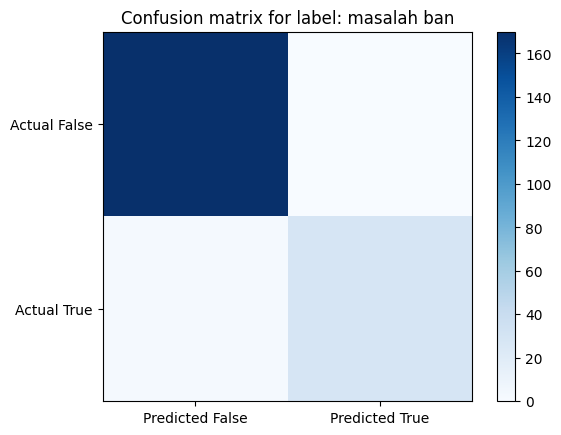

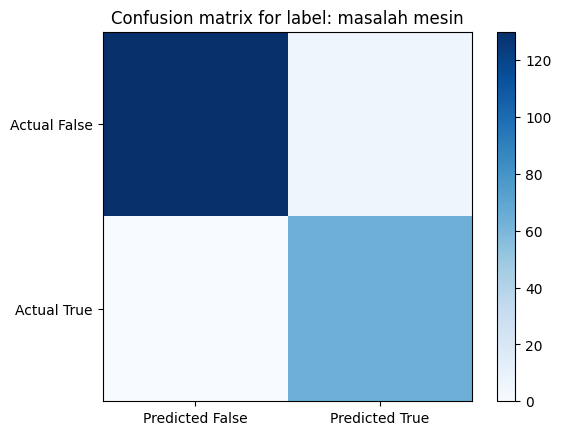

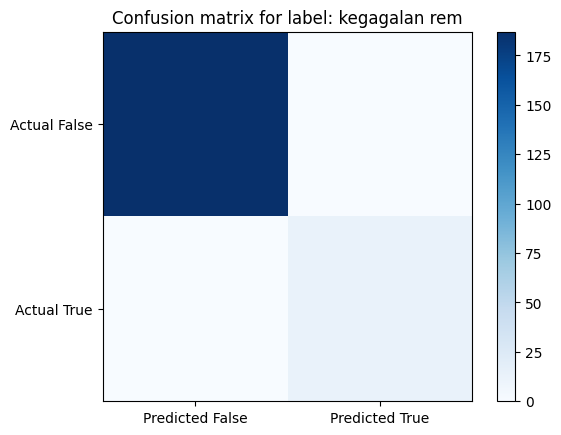

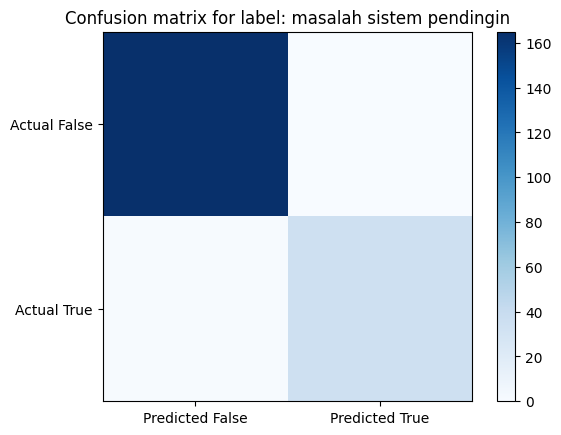

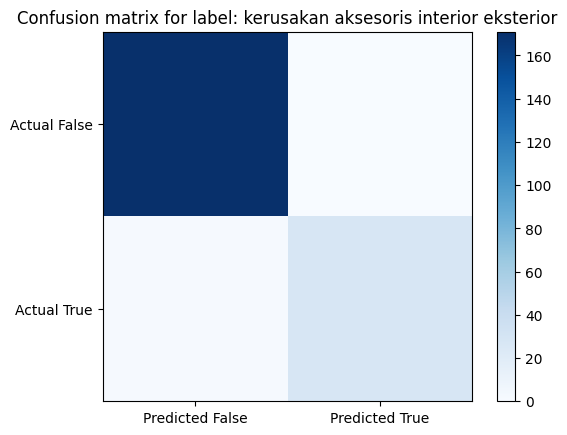

                                        precision    recall  f1-score   support

                masalah sistem knalpot       1.00      0.88      0.94        41
                     masalah transmisi       1.00      0.92      0.96        49
                      masalah suspensi       1.00      0.79      0.88        14
                      gangguan listrik       1.00      1.00      1.00        45
            masalah sistem bahan bakar       1.00      0.69      0.82        26
                        masalah kemudi       1.00      0.96      0.98        24
                           masalah ban       1.00      0.93      0.97        30
                         masalah mesin       0.91      1.00      0.96        64
                         kegagalan rem       1.00      1.00      1.00        13
              masalah sistem pendingin       1.00      0.97      0.99        35
kerusakan aksesoris interior eksterior       1.00      0.93      0.96        29

                             micro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import numpy as np

# Step 3: Calculate confusion matrix
y_true = y_train_labels  # Ground truth labels
conf_matrix = multilabel_confusion_matrix(y_true, rounded_classification_features)

# Step 4: Visualization (example using matplotlib)
import matplotlib.pyplot as plt

for i, label in enumerate(LABELS):
    plt.figure()
    plt.imshow(conf_matrix[i], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion matrix for label: {label}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.show()

# Step 5: Metrics calculation and reporting
report = classification_report(y_true, rounded_classification_features, target_names=LABELS)
print(report)


In [ ]:
import numpy as np

# Step 1: Predict probabilities using your trained model
predicted_probs = classification_model.predict(test_dataset_classification)

# Step 2: Calculate confidence scores
confidence_scores = np.max(predicted_probs, axis=1)  # Using maximum probability as confidence score

# If you want to calculate confidence scores for each label separately
label_confidence_scores = np.max(predicted_probs, axis=0)  # Confidence score for each label

# Print or use the confidence scores as needed
for i, confidence_score in enumerate(confidence_scores):
    print(f"Instance {i + 1}: Confidence Score = {confidence_score:.4f}")

for label, confidence_score in zip(LABELS, label_confidence_scores):
    print(f"Label '{label}': Confidence Score = {confidence_score:.4f}")


2/2 [==============================] - 1s 311ms/step
Instance 1: Confidence Score = 0.9656
Instance 2: Confidence Score = 0.9949
Instance 3: Confidence Score = 0.9935
Instance 4: Confidence Score = 0.9565
Instance 5: Confidence Score = 0.0876
Instance 6: Confidence Score = 0.9990
Instance 7: Confidence Score = 0.7917
Instance 8: Confidence Score = 0.9997
Instance 9: Confidence Score = 0.9974
Instance 10: Confidence Score = 1.0000
Instance 11: Confidence Score = 0.9995
Instance 12: Confidence Score = 0.9999
Instance 13: Confidence Score = 0.9998
Instance 14: Confidence Score = 0.9987
Instance 15: Confidence Score = 0.9995
Instance 16: Confidence Score = 0.9740
Instance 17: Confidence Score = 1.0000
Instance 18: Confidence Score = 0.9997
Instance 19: Confidence Score = 0.9893
Instance 20: Confidence Score = 0.1786
Instance 21: Confidence Score = 0.9950
Instance 22: Confidence Score = 1.0000
Instance 23: Confidence Score = 0.9977
Instance 24: Confidence Score = 0.9979
Instance 25: Confide

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import numpy as np

# Step 3: Calculate confusion matrix
y_true = y_train_sukucadang  # Ground truth labels
conf_matrix = multilabel_confusion_matrix(y_true, rounded_classification_features)

# Step 4: Visualization (example using matplotlib)
import matplotlib.pyplot as plt

for i, label in enumerate(LABELS):
    plt.figure()
    plt.imshow(conf_matrix[i], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion matrix for label: {label}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.show()

# Step 5: Metrics calculation and reporting
report = classification_report(y_true, rounded_classification_features, target_names=LABELS)
print(report)


## Classification Evaluation

In [ ]:
eval = classification_model.evaluate(test_dataset_classification)
eval

3/3 [==============================] - 1s 377ms/step - loss: 0.2745 - label_output_loss: 0.2532 - estimated_price_output_loss: 0.4259 - label_output_label_accuracy: 0.9406 - estimated_price_output_price_mse: 0.4259


[0.2744500935077667,
 0.253154993057251,
 0.4259026050567627,
 0.9406060576438904,
 0.4259026050567627]

In [ ]:
sample = preprocess.preprocessing(['AC tidak dingin', 'Ban bocor', 'Mesin bersuara berisik'])
classification_model.predict(sample)

1/1 [==============================] - 3s 3s/step


[array([[7.0092519e-04, 7.2459894e-05, 2.5737181e-04, 2.7817568e-01,
         4.3035779e-02, 3.9310884e-03, 5.0154107e-04, 1.9584121e-01,
         2.2039497e-03, 9.4530612e-01, 2.1392332e-02],
        [2.4967694e-03, 3.0002110e-03, 7.0081712e-03, 8.2546674e-02,
         2.0875344e-01, 1.5894281e-02, 9.8781163e-01, 1.4895588e-01,
         3.8251216e-03, 3.8391896e-02, 1.2552190e-03],
        [1.7279878e-01, 5.7404027e-03, 2.2110289e-04, 5.8525510e-04,
         1.0729047e-02, 1.5315035e-01, 1.6089566e-03, 8.9087176e-01,
         2.2122647e-04, 4.5745362e-02, 4.7495004e-02]], dtype=float32),
 array([[-0.33618718],
        [-0.10273409],
        [ 0.37385815]], dtype=float32)]

In [ ]:
prediction_each_labels(scenario=2, predictions=rounded_classification_features_test, y_test=y_test_labels)

Scenario:  2
Label: masalah sistem knalpot
Precision: 0.875
Recall: 0.6363636363636364
F1-score: 0.7368421052631579

Label: masalah transmisi
Precision: 0.8333333333333334
Recall: 0.7142857142857143
F1-score: 0.7692307692307692

Label: masalah suspensi
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999

Label: gangguan listrik
Precision: 1.0
Recall: 0.7272727272727273
F1-score: 0.8421052631578948

Label: masalah sistem bahan bakar
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666

Label: masalah kemudi
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999

Label: masalah ban
Precision: 1.0
Recall: 0.5714285714285714
F1-score: 0.7272727272727273

Label: masalah mesin
Precision: 0.7727272727272727
Recall: 0.9444444444444444
F1-score: 0.85

Label: kegagalan rem
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666

Label: masalah sistem pendingin
Precision: 0.8333333333333334
Recall: 0.7142857142857143
F1-score: 0.7692307692307692

Label: kerusakan aksesoris interior ekster

## Predict Biaya Evaluation

In [ ]:
suku_cadang_model.evaluate(test_suku_cadang_dataset)

1/1 [==============================] - 0s 14ms/step - loss: 11.1597 - sparse_categorical_accuracy: 0.1400


[11.159682273864746, 0.14000000059604645]

In [ ]:
suku_cadang_predictions = suku_cadang_model.predict(test_suku_cadang_dataset)
suku_cadang_predictions_rounded = np.where(suku_cadang_predictions >= 0.5, 1, 0)
suku_cadang_predictions_rounded

1/1 [==============================] - 0s 111ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

# For predict_suku_cadang_model
suku_cadang_predictions = suku_cadang_model.predict(test_suku_cadang_dataset)
suku_cadang_confidence_scores = get_confidence_scores(suku_cadang_predictions)
suku_cadang_predictions = np.argmax(suku_cadang_predictions, axis=1)  # Convert probabilities to class labels

# Since suku_cadang_labels is not available in your dataset, you might need to have a separate dataset for evaluation
# suku_cadang_labels = ...

# plot_confusion_matrix(suku_cadang_labels, suku_cadang_predictions, suku_cadang_labels, "Predict Suku Cadang Model")

1/1 [==============================] - 0s 22ms/step


NameError: ignored

# 4.6 Deployment

## Saving Model

In [ ]:
!rm suku_cadang_model.json
!rm suku_cadang_model_weight.keras
!rm suku_cadang_model.keras

model_json = classification_model.to_json()
with open('./classification_model.json', 'w') as json_file:
  json_file.write(model_json)

classification_model.save_weights('./classification_model_weight.keras')
classification_model.save('./classification_model.keras')

!cp classification_model.json '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Produk/Model/'
!cp classification_model_weight.keras '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Produk/Model/'
!cp classification_model.keras '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Produk/Model/'

rm: cannot remove 'suku_cadang_model.json': No such file or directory
rm: cannot remove 'suku_cadang_model_weight.keras': No such file or directory
rm: cannot remove 'suku_cadang_model.keras': No such file or directory


In [ ]:
model_json_path = '/content/drive/MyDrive/TA/classification_model.json'
model_weight_path = '/content/drive/MyDrive/TA/classification_model_weight.keras'
model_path = '/content/drive/MyDrive/TA/classification_model.keras'

## Process Class

In [ ]:
from keras.models import model_from_json

def initmodel():
  json_file = open(model_json_path, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  loaded_model.load_weights(model_weight_path)
  print('loaded from disk')

In [19]:
BERT_NAME = 'indobenchmark/indobert-lite-base-p1'

MODEL_URL = '/content/drive/MyDrive/Kuliah/TA Akhdan Musyaffa Firdaus/Bimbingan - Akhdan Musyaffa Firdaus/Produk/Model'
MODEL_CLASSIFICATION_PATH = '/classification_model.keras'

In [97]:
class Limit():
  def __init__(self):
    self.dinasPejabat = 38730000
    self.dinasHarian = 33650000
    self.stopwords = [
      'rekondisi',
      'overhaul',
      'turun mesin',
      'bongkar mesin'
    ]

  def containsStopwords(self, values):
    for string in values:
      for keyword in self.stopwords:
        if keyword in string:
          return True
    return False

  def beyondLimitation(self, current_values, car_type):
    status = 0,
    data = {
        'penggunaan': current_values,
        'limit': 0,
        'tersisa': 0
    }

    if car_type == 1:
        limit_value = self.dinasPejabat
        message_prefix = 'Anggaran Kendaraan dinas jabatan'
    else:
        limit_value = self.dinasHarian
        message_prefix = 'Anggaran Kendaraan dinas harian'

    if current_values >= limit_value:
        status = 1
        message = f'{message_prefix} sudah melewati batas yang ditentukan, segera hubungi admin'
    else:
        message = f'{message_prefix} masih dalam tahap wajar'

    data['limit'] = limit_value
    data['tersisa'] = limit_value - current_values

    result = {
        'status': status,
        'message': message,
        'data': data
    }

    return result

In [99]:
limit = Limit()
limit.beyondLimitation(40000000, 0)

{'status': 1,
 'message': 'Anggaran Kendaraan dinas harian sudah melewati batas yang ditentukan, segera hubungi admin',
 'data': {'penggunaan': 40000000, 'limit': 33650000, 'tersisa': -6350000}}

In [77]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel
from sklearn.preprocessing import MinMaxScaler

class Process():
    def __init__(self, max_len=256):
        self.classification_model = tf.keras.models.load_model(
            MODEL_URL + MODEL_CLASSIFICATION_PATH,
            custom_objects={
                'TFBertModel': TFBertModel.from_pretrained(BERT_NAME)},
        )
        self.preprocess = Preprocess(max_len=max_len)
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.threshold = 0.5
        self.limit = Limit()

    def label_rounded(self, label_predictions):
        return np.where(label_predictions > self.threshold, 1, 0).tolist()

    def price_predictions(self, price_predictions):
        original_value = np.array(self.scaler.inverse_transform(price_predictions))
        return original_value.flatten()

    def rounded_predictions(self, tokenized_inputs):
        predictions = self.classification_model.predict(tokenized_inputs)
        rounded_label = self.label_rounded(predictions[0])
        # price_predictions = self.price_predictions(predictions[1])
        price_predictions = predictions[1]

        return [rounded_label, price_predictions]

    def predict(self, labels, inputs):
        preprocessed_inputs = self.preprocess.preprocessing(inputs)

        isSuccess = True
        message = 'Berhasil mengklasifikasikan masalah'

        if (self.limit.containsStopwords(preprocessed_inputs)):
            isSuccess = False
            message = 'Laporan Harus di cek terlebih dahulu oleh admin'

        tokenized_inputs = self.preprocess.tokenizing(preprocessed_inputs)
        all_predictions = self.rounded_predictions(tokenized_inputs)
        predictions = all_predictions[0]

        outputs = []

        for i in range(len(predictions)):
            prediction = predictions[i]
            total_bobot = 0
            total_masalah = 0
            label_detected = []

            for j in range(len(prediction)):
                if prediction[j] == 1:
                    total_bobot += labels[j]['bobot']
                    total_masalah += 1
                    label_detected.append(labels[j]['label'])

            output = {
                'laporan': inputs[i],
                'label': label_detected,
                'prediction': prediction,
                # 'total_bobot': total_bobot,
                # 'total_masalah': total_masalah,
                'severity': total_bobot / total_masalah,
                'accuracy': 0
            }
            outputs.append(output)

        return {
            'success': isSuccess,
            'message': message,
            'data': {
                'outputs': outputs,
                'sum_severity': sum([output['severity'] for output in outputs]) / len(outputs)
            }
        }

process = Process(max_len=256)

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p1 were not used when initializing TFBertModel: ['sop_classifier', 'albert', 'predictions']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p1 and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use 

In [80]:
LABELS = [
    {
        "indeks": 0,
        "label": "Masalah Sistem Knalpot",
        "bobot": 3
    },
    {
        "indeks": 1,
        "label": "Masalah Transmisi",
        "bobot": 4
    },
    {
        "indeks": 2,
        "label": "Masalah Suspensi",
        "bobot": 3
    },
    {
        "indeks": 3,
        "label": "Gangguan Listrik",
        "bobot": 4
    },
    {
        "indeks": 4,
        "label": "Masalah Sistem Bahan Bakar",
        "bobot": 4
    },
    {
        "indeks": 5,
        "label": "Masalah Kemudi",
        "bobot": 4
    },
    {
        "indeks": 6,
        "label": "Masalah Ban",
        "bobot": 4
    },
    {
        "indeks": 7,
        "label": "Masalah Mesin",
        "bobot": 5
    },
    {
        "indeks": 8,
        "label": "Kegagalan Rem",
        "bobot": 5
    },
    {
        "indeks": 9,
        "label": "Masalah Sistem Pendingin",
        "bobot": 3
    },
    {
        "indeks": 10,
        "label": "Kerusakan Aksesoris Interior Eksterior",
        "bobot": 1
    }
]

inputs = [
    'mesin tidak bisa menyala',
    'AC mobil tidak dingin',
    'Mesin bersuara kasar',
    'ban bocor dan harus diganti dengan yang baru',
    'asap knalpot berwarna putih',
    # 'kaca spion pecah dan harus diganti',
    'lampu sen kendaraan tidak berfungsi',
    'Mesin harus di rekondisi'
]

predictions = process.predict(LABELS, inputs)

predictions

1/1 [==============================] - 0s 264ms/step


{'success': False,
 'message': 'Laporan Harus di cek terlebih dahulu oleh admin',
 'data': {'outputs': [{'laporan': 'mesin bisa nyala',
    'label': ['Masalah Mesin'],
    'prediction': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'severity': 5.0,
    'accuracy': 0},
   {'laporan': 'ac mobil dingin',
    'label': ['Masalah Sistem Pendingin'],
    'prediction': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    'severity': 3.0,
    'accuracy': 0},
   {'laporan': 'mesin suara kasar',
    'label': ['Masalah Mesin'],
    'prediction': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'severity': 5.0,
    'accuracy': 0},
   {'laporan': 'ban bocor harus ganti yang baru',
    'label': ['Masalah Ban'],
    'prediction': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'severity': 4.0,
    'accuracy': 0},
   {'laporan': 'asap knalpot warna putih',
    'label': ['Masalah Sistem Knalpot'],
    'prediction': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'severity': 3.0,
    'accuracy': 0},
   {'laporan': 'lampu sen kendara fungsi',
    'label

In [ ]:
# predictions[1]

original_value = np.array(scaler.inverse_transform(predictions[1]))
original_value.flatten()

array([-96.08847  , -64.30194  , -86.105606 , -49.991566 ,  49.497833 ,
        -2.6353183, -84.27869  ], dtype=float32)

## Implementasi pada Flask

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

preprocess = Preprocess()
process = Process()

@app.route("/hello")
def hello():
  return jsonify({
      'data': 'Hello world'
  })

@app.route("/predict", methods=['POST'])
def predict():
  body = request.get_json()
  inputs = body.get('inputs')
  tokenized = preprocess.preprocessing(inputs)
  predictions = process.predict(tokenized)
  return jsonify({
      'data': predictions
  })

app.run()

In [ ]:
def weighted_product(input_data, bobot, skala_kepentingan, skala_kerusakan):
    # Langkah 2: Normalisasi Bobot
    total_bobot = sum(bobot)
    bobot_ternormalisasi = [w / total_bobot for w in bobot]

    # Langkah 3: Hitung Produk Bobot dan Skala Kepentingan
    produk_bobot_skala = [[bobot_ternormalisasi[i] * skala_kepentingan[j] for j in range(len(skala_kepentingan))] for i in range(len(bobot_ternormalisasi))]

    # Langkah 4: Jumlahkan Hasil Produk
    total_produk = [sum(produk_bobot_skala[i]) for i in range(len(produk_bobot_skala))]

    # Langkah 5: Tentukan Skala Kerusakan
    hasil_skala_kerusakan = []
    for total in total_produk:
        if total < 1:
            hasil_skala_kerusakan.append(skala_kerusakan[1])
        else:
            hasil_skala_kerusakan.append(skala_kerusakan[round(total)])

    return total_produk, hasil_skala_kerusakan

# Data
input_data = {
    "Masalah Sistem Knalpot": 2,
    "Masalah Suspensi": 1,
    "Gangguan Listrik": 3,
}

bobot = [3, 3, 4, 4, 4, 4, 4, 5, 5, 3, 1]
skala_kepentingan = [5, 4, 3, 2, 1]
skala_kerusakan = {
    1: "Rendah",
    2: "Rusak",
    3: "Rusak",
    4: "Rusak",
    5: "Rusak",
    6: "Parah",
    7: "Parah",
    8: "Parah",
    9: "Parah",
    10: "Parah"
}

hasil = weighted_product(input_data, bobot, skala_kepentingan, skala_kerusakan)
total_produk = hasil[0]
hasil_skala_kerusakan = hasil[1]

print("Indeks Kerusakan dalam persentase")
for i, total in enumerate(total_produk):
    persentase = (total / max(total_produk)) * 100
    print(f"Alternatif {i + 1}: {persentase:.2f}%")

print("\nHasil Skala Kerusakan yang diperoleh")
for i, skala in enumerate(hasil_skala_kerusakan):
    print(f"Alternatif {i + 1}: {skala}")

Indeks Kerusakan dalam persentase
Alternatif 1: 60.00%
Alternatif 2: 60.00%
Alternatif 3: 80.00%
Alternatif 4: 80.00%
Alternatif 5: 80.00%
Alternatif 6: 80.00%
Alternatif 7: 80.00%
Alternatif 8: 100.00%
Alternatif 9: 100.00%
Alternatif 10: 60.00%
Alternatif 11: 20.00%

Hasil Skala Kerusakan yang diperoleh
Alternatif 1: Rendah
Alternatif 2: Rendah
Alternatif 3: Rusak
Alternatif 4: Rusak
Alternatif 5: Rusak
Alternatif 6: Rusak
Alternatif 7: Rusak
Alternatif 8: Rusak
Alternatif 9: Rusak
Alternatif 10: Rendah
Alternatif 11: Rendah


In [ ]:
label_bobot = {
    'Masalah Sistem Knalpot': 3,
    'Masalah Transmisi': 4,
    'Masalah Suspensi': 3,
    'Gangguan Listrik': 4,
    'Masalah Sistem Bahan Bakar': 4,
    'Masalah Kemudi': 4,
    'Masalah Ban': 4,
    'Masalah Mesin': 5,
    'Kegagalan Rem': 5,
    'Masalah Sistem Pendingin': 3,
    'Kerusakan Aksesoris Interior Eksterior': 1
}

skala_kepentingan = [5, 4, 3, 2, 1]

data = [
    ['Masalah Sistem Pendingin', 'Masalah Mesin', 'Masalah Kemudi'],
    ['Kegagalan Rem'],
    ['Masalah Transmisi'],
]

total_bobot_data = []
for deteksi in data:
    total_bobot_data.append(sum(label_bobot[label] for label in deteksi))

produk_bobot_skala_data = []
for total_bobot in total_bobot_data:
    produk_bobot_skala_data.append([total_bobot * skala for skala in skala_kepentingan])

total_produk_data = [sum(produk_bobot_skala) for produk_bobot_skala in produk_bobot_skala_data]

hasil_skala_kerusakan_data = []
for total in total_produk_data:
    if total < min(skala_kerusakan.keys()):
        hasil_skala_kerusakan_data.append(skala_kerusakan[min(skala_kerusakan.keys())])
    elif total > max(skala_kerusakan.keys()):
        hasil_skala_kerusakan_data.append(skala_kerusakan[max(skala_kerusakan.keys())])
    else:
        hasil_skala_kerusakan_data.append(skala_kerusakan[round(total)])

total_max = max(total_produk_data)
persentase_kerusakan_data = [(total / total_max) * 100 for total in total_produk_data]

persentase_kerusakan_data

[100.0, 41.66666666666667, 33.33333333333333]

In [ ]:
label_bobot = {
    'Masalah Sistem Knalpot': 3,
    'Masalah Transmisi': 4,
    'Masalah Suspensi': 3,
    'Gangguan Listrik': 4,
    'Masalah Sistem Bahan Bakar': 4,
    'Masalah Kemudi': 4,
    'Masalah Ban': 4,
    'Masalah Mesin': 5,
    'Kegagalan Rem': 5,
    'Masalah Sistem Pendingin': 3,
    'Kerusakan Aksesoris Interior Eksterior': 1
}

skala_kepentingan = [5, 4, 3, 2, 1]
skala_kerusakan = {
    1: 'Rendah',
    2: 'Rusak',
    3: 'Rusak',
    4: 'Rusak',
    5: 'Rusak',
    6: 'Parah',
    7: 'Parah',
    8: 'Parah',
    9: 'Parah',
    10: 'Parah'
}

data = [
    # ['Masalah Sistem Pendingin', 'Masalah Mesin'],
    ['Kerusakan Aksesoris Interior Eksterior']
]

hasil_data = []
total_max = 0
for deteksi in data:
    total_bobot = sum(label_bobot[label] for label in deteksi)
    total_produk = sum(total_bobot * skala for skala in skala_kepentingan)

    indeks_kerusakan = min(max(round(total_produk), 1), 10)
    persentase_kerusakan = (total_produk / (len(skala_kepentingan) * 10)) * 100
    persentase_kerusakan = max(min(persentase_kerusakan, 100), 0)  # Batasi antara 0 dan 100

    hasil_data.append({
        'indeks kerusakan': indeks_kerusakan,
        'persentase kerusakan': persentase_kerusakan,
        'skala kerusakan': skala_kerusakan[indeks_kerusakan]
    })

    total_max = max(total_produk, total_max)

hasil_keseluruhan = {
    'indeks keseluruhan': min(max(round(total_max), 1), 10),
    'persentase keseluruhan': (total_max / (len(data) * len(skala_kepentingan) * 10)) * 100,
    'skala kerusakan': skala_kerusakan[min(max(round(total_max), 1), 10)]
}

output = {
    'hasil': hasil_data,
    'keseluruhan': hasil_keseluruhan
}

print(output)


{'hasil': [{'indeks kerusakan': 10, 'persentase kerusakan': 30.0, 'skala kerusakan': 'Parah'}], 'keseluruhan': {'indeks keseluruhan': 10, 'persentase keseluruhan': 30.0, 'skala kerusakan': 'Parah'}}


In [ ]:
import bisect

# Data
skala_kerusakan = {
    1: "Rendah",
    4: "Rusak",
    8: "Parah"
}

skala_kepentingan = {
    5: "Sangat Penting",
    4: "Penting",
    3: "Kurang Penting",
    2: "Tidak Penting",
    1: "Sangat Tidak Penting"
}

label_bobot = {
    'Masalah Sistem Knalpot': 3,
    'Masalah Transmisi': 4,
    'Masalah Suspensi': 3,
    'Gangguan Listrik': 4,
    'Masalah Sistem Bahan Bakar': 4,
    'Masalah Kemudi': 4,
    'Masalah Ban': 4,
    'Masalah Mesin': 5,
    'Kegagalan Rem': 5,
    'Masalah Sistem Pendingin': 3,
    'Kerusakan Aksesoris Interior Eksterior': 1
}

data_alternatif = [
    ['Masalah Sistem Knalpot', 'Masalah Suspensi', 'Gangguan Listrik'],
    ['Masalah Mesin', 'Kegagalan Rem', 'Masalah Kemudi'],
    ['Kerusakan Aksesoris Interior Eksterior', 'Masalah Listrik'],
]

hasil = []

for alternatif in data_alternatif:
    total_skor = sum(label_bobot[label] * skala_kepentingan[label] for label, scale in zip(alternatif, [5, 4, 3]))


    # Find the nearest key to total_skor using bisect
    sorted_skala_kerusakan = sorted(skala_kerusakan.keys())
    nearest_index = bisect.bisect_left(sorted_skala_kerusakan, total_skor)
    if nearest_index == 0:
        nearest_key = sorted_skala_kerusakan[0]
    elif nearest_index == len(sorted_skala_kerusakan):
        nearest_key = sorted_skala_kerusakan[-1]
    else:
        left_key = sorted_skala_kerusakan[nearest_index - 1]
        right_key = sorted_skala_kerusakan[nearest_index]
        if abs(total_skor - left_key) < abs(total_skor - right_key):
            nearest_key = left_key
        else:
            nearest_key = right_key

    skala_kerusakan_alternatif = skala_kerusakan[nearest_key]
    persentase_kerusakan_alternatif = (total_skor / (max(label_bobot.values()) * len(alternatif))) * 100

    hasil.append({
        'indeks kerusakan': total_skor,
        'persentase kerusakan': persentase_kerusakan_alternatif,
        'skala kerusakan': skala_kerusakan_alternatif
    })

total_indeks_keseluruhan = sum(hasil_item['indeks kerusakan'] for hasil_item in hasil)
total_persentase_keseluruhan = (total_indeks_keseluruhan / (max(label_bobot.values()) * sum(len(alternatif) for alternatif in data_alternatif))) * 100

sorted_skala_kerusakan = sorted(skala_kerusakan.keys())
nearest_index = bisect.bisect_left(sorted_skala_kerusakan, total_indeks_keseluruhan)
if nearest_index == 0:
    nearest_key = sorted_skala_kerusakan[0]
elif nearest_index == len(sorted_skala_kerusakan):
    nearest_key = sorted_skala_kerusakan[-1]
else:
    left_key = sorted_skala_kerusakan[nearest_index - 1]
    right_key = sorted_skala_kerusakan[nearest_index]
    if abs(total_indeks_keseluruhan - left_key) < abs(total_indeks_keseluruhan - right_key):
        nearest_key = left_key
    else:
        nearest_key = right_key

total_skala_kerusakan_keseluruhan = skala_kerusakan[nearest_key]

output = {
    'hasil': hasil,
    'keseluruhan': {
        'indeks keseluruhan': total_indeks_keseluruhan,
        'persentase keseluruhan': total_persentase_keseluruhan,
        'skala kerusakan': total_skala_kerusakan_keseluruhan
    }
}

print(output)


KeyError: ignored

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import os

from process import Process

app = Flask(__name__)
CORS(app)

if os.environ.get('FLASK_ENV') == 'production':
    app.config.from_object('config_prod')
else:
    app.config.from_object('config_dev')

process = Process(
    bert_name=app.config['BERT_NAME'],
    model_classification_path=app.config['MODEL_CLASSIFICATION_PATH'],
    model_prediction_path=app.config['MODEL_PREDICT_SPAREPART_PATH'],
)

@app.route('/predict', methods=['POST'])
def predict():
    params = request.args
    body = request.get_json()
    labels = body.get('labels')
    inputs = body.get('inputs')
    predictions = process.predict(labels, inputs)
    return jsonify({'data': predictions})

if __name__ == '__main__':
    app.run(
        debug=app.config['DEBUG'],
        host=app.config['HOST'],
        port=app.config['PORT']
    )

# Test

In [17]:
limit = Limit()

for i in range(len(limit.excludeKeywords)):
  limit.excludeKeywords[i]= preprocess.casefolding(limit.excludeKeywords[i])
  limit.excludeKeywords[i]= preprocess.cleaning(limit.excludeKeywords[i])
  limit.excludeKeywords[i]= preprocess.stemming(limit.excludeKeywords[i])
  limit.excludeKeywords[i]= preprocess.stopwordremove(limit.excludeKeywords[i])

print(limit.excludeKeywords)

['rekondisi', 'overhaul', 'turun mesin', 'bongkar mesin']
